In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
from matplotlib.font_manager import FontProperties
from matplotlib import rc
import matplotlib as mpl
import sys
sys.path.append("..")
from exotop.model_1D import the_results as plottop
from exotop.model_1D import inputs as ins
from exotop.model_1D import parameters as p
from exotop.useful_and_bespoke import dark_background, imscatter
import matplotlib.ticker as ticker
import matplotlib.lines as mlines

# set paths
# fig_path = '/space/cmg76/figs/' # office
fig_path = 'figs/' # laptop#
goodfig_path = '../latex/report-firstyr/figs/'
fig_format = '.png'
benchmark_path = '../benchmarks/'
planet_icon_path='/home/claire/Pictures/science-graphics/planet_png/'

# set mpl display parameters
# mpl.rcParams['axes.linewidth'] = 2  # set the value globally - for poster
# rc('font',**{'family':'serif','serif':['Times New Roman']})  # latex font for matplotlib CMU Serif Roman
# # rc('font',**{'family':'monospace','monospace':['Ubuntu Mono']})  # for computery poster 
# rc('text', usetex=True)  # turn on for latexy font
# mpl.font_manager._rebuild()
# plt.style.use('dark_background')

Remember to add facecolor=fig.get_facecolor() to savefig()


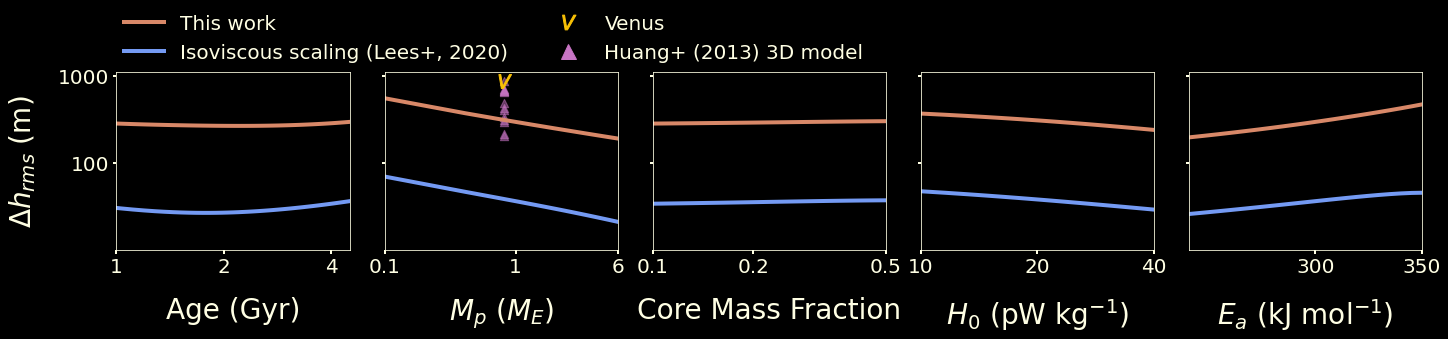

In [7]:
# how h varies across key input parameters
labelsize=28
legsize=20
xlabelpad=20
fig, axes = plottop.plot_h_relative_multi(age=4.5, alpha=1, wspace=0.15, legsize=legsize, 
                                          ticksize=20, labelsize=labelsize, 
                                        yset_ylim=False, legend=False, 
                                          lw=4, #legtitle=r'\textbf{\textit{Model}}', 
                                        ylabel='$\Delta h_{rms}$ (m)',
                                          nplanets=20, log=False,
                                          relative=False,
                                          labelpad=20, legendtop=True, tickwidth=2,
                                        save=False, fname='relative_h_slides', fig_path=fig_path,
                                        update_kwargs={'visc_type':'KW'},
                                        models=['dyn_top_rms', 'dyn_top_rms_isoviscous'],
                                        labels=['This work',
                                                'Isoviscous (Lees, Rudge & McKenzie 2020)'],
                                        x_vars=['age', 'M_p', 'CMF', 'H0', 'Ea'],
                                        c=['#d88868','#749af3'])

for ax in axes:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim((10, 1100))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())
axes[0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
axes[0].yaxis.set_minor_formatter(ticker.NullFormatter())
axes[0].set_ylabel('$\Delta h_{rms}$ (m)', fontsize=labelsize, c='xkcd:off white')
axes[0].set_yticks([100, 1000])


# VENUS: 850 m
h_Venus = 865.4906656355711
M_Venus = 0.815

h_Mars = 6688.627942023225
M_Mars = 0.107

M_Huang = M_Venus


ax = axes[1]
# imscatter(M_Venus, h_Venus, planet_icon_path + 'Venus.png', zoom=0.04, ax=ax)
# imscatter(M_Mars, h_Mars, planet_icon_path + 'Mars.png', zoom=0.08, ax=ax)

ax.scatter(M_Venus, h_Venus, marker='$V$', c='xkcd:goldenrod', s=200, zorder=100)
# ax.scatter(M_Venus, h_Huang, marker='^', c='xkcd:goldenrod', s=30)

# Huang cases 1-13, 15
h_Huang = np.array([200.15279436132423 , 688.2014927583677 , 673.7880493468331 , 402.07565967751117 , 695.2136989391211 , 672.4561163950626 , 214.12066607342535 , 488.4601789919337 , 878.5607285545191 , 292.43829959982384 , 311.3352436867767 , 339.3664129742059 , 640.1361418805931 , 430.1894190342128 ])
for h in h_Huang:
    ax.scatter(M_Huang, h, marker='^', s=70, alpha=0.5, c='xkcd:orchid', label=r'Huang+ (2013)', zorder=1)


handles =[mlines.Line2D([], [], color='#d88868', ls='-',
                                 markersize=0, lw=4, label='This work'),
         mlines.Line2D([], [], color='#749af3', ls='-',
                                 markersize=0, lw=4, label='Isoviscous scaling (Lees+, 2020)'),
                   mlines.Line2D([], [], color='xkcd:goldenrod', marker='$V$', 
                                 markersize=15, lw=0, label=r'Venus'),
                   mlines.Line2D([], [], color='xkcd:orchid', marker='^', 
                                 markersize=15, lw=0, label=r'Huang+ (2013) 3D model'),]


legend = axes[0].legend(handles=handles, frameon=False, fontsize=legsize,
                   borderaxespad=0, 
                   loc='lower left', bbox_to_anchor=(0.0, 1.01), ncol=2, )

fig, *axes = dark_background(fig, axes)
i=0
axes[i].set_xlim((1, 4.5)) #age
axes[i].set_xticks([1, 2, 4])
i = i+1
axes[i].set_xlim((0.1, 6)) #mass
axes[i].set_xticks([0.1, 1, 6])
i = i+1
axes[i].set_xlim((0.1, 0.5)) #cmf
axes[i].set_xticks([0.1, 0.2,0.5])
i = i+1
axes[i].set_xlim((10, 40)) #h0
axes[i].set_xticks([10, 20, 40])
i = i+1
axes[i].set_xlim((250, 350)) #ea
axes[i].set_xticks([300, 350])
fig.savefig(fig_path+'h_parameters_slides'+fig_format)

varying age
varying mass
varying CMF
varying H0
varying age
varying mass


../exotop/model_1D/the_results.py:604: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
../exotop/model_1D/the_results.py:604: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


varying CMF


../exotop/model_1D/the_results.py:604: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


varying H0


../exotop/model_1D/the_results.py:604: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


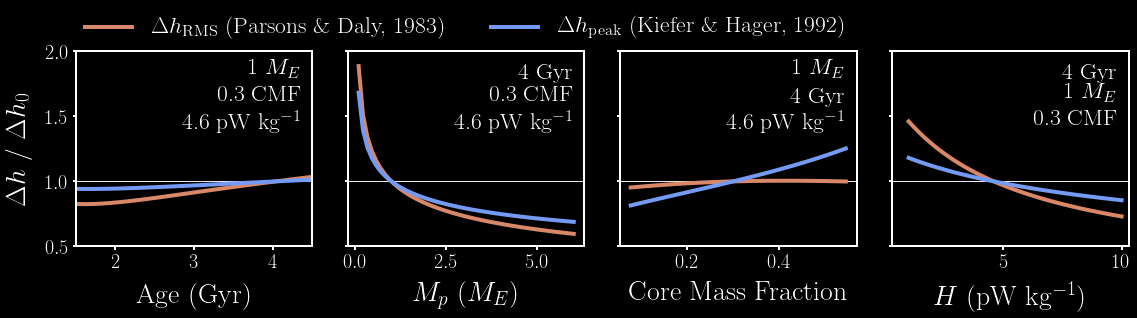

In [2]:
# how h varies across key input parameters

fig, axes = plottop.plot_h_relative_multi(age=4, alpha=1, wspace=0.15, legsize=23.5, ticksize=20, labelsize=28, 
                                        ymin=0.5, ymax=2, lw=4, #legtitle=r'\textbf{\textit{Model}}', 
                                        labelpad=10, legendtop=True, tickwidth=2,
                                        save=False, fname='relative_h_poster', fig_path=fig_path,
                                        visc_type='KW',
                                        models=['dyn_top_rms_isoviscous','dyn_top_KH'],
                                        labels=['$\Delta h_{\mathrm{RMS}}$ (Parsons \& Daly, 1983)',
                                                '$\Delta h_{\mathrm{peak}}$ (Kiefer \& Hager, 1992)'],
                                        x_vars=['age', 'M_p', 'CMF', 'H0'],
                                        c=['#d88868','#749af3'])
